In [7]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob  # For sentiment analysis

df = pd.read_csv("Test.csv")

print("✅ Dataset loaded successfully!")
print("Shape of dataset:", df.shape)
print(df.head(), "\n")

✅ Dataset loaded successfully!
Shape of dataset: (5000, 2)
                                                text  label
0  I always wrote this series off as being a comp...      0
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2  This movie was so poorly written and directed ...      0
3  The most interesting thing about Miryang (Secr...      1
4  when i first read about "berlin am meer" i did...      0 



In [8]:
print("Columns:", df.columns, "\n")
# Assuming the column name is 'text'
text_data = df['text']
print("Sample Text:\n", text_data.head(), "\n")

Columns: Index(['text', 'label'], dtype='object') 

Sample Text:
 0    I always wrote this series off as being a comp...
1    1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...
2    This movie was so poorly written and directed ...
3    The most interesting thing about Miryang (Secr...
4    when i first read about "berlin am meer" i did...
Name: text, dtype: object 



In [9]:
# Extract and remove handles from the fetched data
# Handles are like @username in tweets, but let's assume IMDB reviews may contain usernames or tags
def clean_text(text):
    text = re.sub(r'@\w+', '', text)         # remove handles
    text = re.sub(r'http\S+', '', text)      # remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove special chars/numbers
    text = re.sub(r'\s+', ' ', text).strip() # remove extra spaces
    return text

cleaned_text = text_data.apply(clean_text)
print("Cleaned Text Sample:\n", cleaned_text.head(), "\n")

Cleaned Text Sample:
 0    I always wrote this series off as being a comp...
1    st watched out of DirSteve Purcell Typical Mar...
2    This movie was so poorly written and directed ...
3    The most interesting thing about Miryang Secre...
4    when i first read about berlin am meer i didnt...
Name: text, dtype: object 



In [11]:
# Perform sentiment analysis and get the new DataFrame

def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity  # range from -1 to 1
    return polarity

sentiment_scores = cleaned_text.apply(get_sentiment)

sentiment_df = pd.DataFrame({
    'cleaned_text': cleaned_text,
    'sentiment_score': sentiment_scores
})

print("✅ Sentiment DataFrame created!\n")
print(sentiment_df.head(), "\n")


✅ Sentiment DataFrame created!

                                        cleaned_text  sentiment_score
0  I always wrote this series off as being a comp...         0.145641
1  st watched out of DirSteve Purcell Typical Mar...         0.028373
2  This movie was so poorly written and directed ...        -0.117849
3  The most interesting thing about Miryang Secre...         0.018818
4  when i first read about berlin am meer i didnt...         0.001808 



In [12]:
# Join both the DataFrames
final_df = pd.concat([df, sentiment_df], axis=1)
print("✅ DataFrames joined successfully!\n")
print(final_df.head(), "\n")

✅ DataFrames joined successfully!

                                                text  label  \
0  I always wrote this series off as being a comp...      0   
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0   
2  This movie was so poorly written and directed ...      0   
3  The most interesting thing about Miryang (Secr...      1   
4  when i first read about "berlin am meer" i did...      0   

                                        cleaned_text  sentiment_score  
0  I always wrote this series off as being a comp...         0.145641  
1  st watched out of DirSteve Purcell Typical Mar...         0.028373  
2  This movie was so poorly written and directed ...        -0.117849  
3  The most interesting thing about Miryang Secre...         0.018818  
4  when i first read about berlin am meer i didnt...         0.001808   



In [13]:
# Apply conditions and view positive, negative, and neutral tweets

def get_sentiment_label(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

final_df['sentiment_label'] = final_df['sentiment_score'].apply(get_sentiment_label)

# View by categories
positive_df = final_df[final_df['sentiment_label'] == "Positive"]
negative_df = final_df[final_df['sentiment_label'] == "Negative"]
neutral_df  = final_df[final_df['sentiment_label'] == "Neutral"]

print("📊 Sentiment Distribution:")
print(final_df['sentiment_label'].value_counts(), "\n")

print("✅ Positive Reviews Sample:\n", positive_df.head(), "\n")
print("❌ Negative Reviews Sample:\n", negative_df.head(), "\n")
print("😐 Neutral Reviews Sample:\n", neutral_df.head(), "\n")

📊 Sentiment Distribution:
sentiment_label
Positive    3765
Negative    1233
Neutral        2
Name: count, dtype: int64 

✅ Positive Reviews Sample:
                                                 text  label  \
0  I always wrote this series off as being a comp...      0   
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0   
3  The most interesting thing about Miryang (Secr...      1   
4  when i first read about "berlin am meer" i did...      0   
5  I saw this film on September 1st, 2005 in Indi...      1   

                                        cleaned_text  sentiment_score  \
0  I always wrote this series off as being a comp...         0.145641   
1  st watched out of DirSteve Purcell Typical Mar...         0.028373   
3  The most interesting thing about Miryang Secre...         0.018818   
4  when i first read about berlin am meer i didnt...         0.001808   
5  I saw this film on September st in Indianapoli...         0.184091   

  sentiment_label  
0        Posi

/tmp/ipython-input-3837098732.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=final_df, palette='viridis')


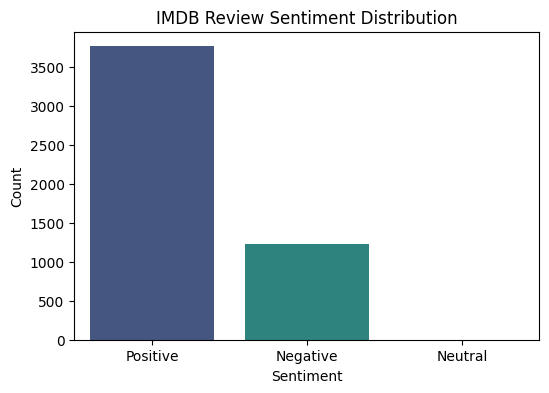

In [14]:
# visualize sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='sentiment_label', data=final_df, palette='viridis')
plt.title("IMDB Review Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
